## 분산분석
## 계산식과 함수이용 결과 비교

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f
#from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from pingouin import welch_anova

no_samples1 = 500
no_samples2 = 500
no_samples3 = 500

g1 = stats.norm(120,15).rvs(no_samples1)
g2 = stats.norm(120.1,16).rvs(no_samples2)
g3 = stats.norm(120.5,15).rvs(no_samples3)

g1_mean = g1.mean()
g2_mean = g2.mean()
g3_mean = g3.mean()

sse1 = ((g1 - g1_mean)**2).sum()
sse2 = ((g2 - g2_mean)**2).sum()
sse3 = ((g3 - g3_mean)**2).sum()#오차제곱합

sse = sse1 + sse2 + sse3
dfe = len(g1) - 1 + len(g2) -1 + len(g3) -1  

y = (g1 + g2 + g3).mean()/3.0

sst1 = len(g1) * ((g1_mean - y)**2)#처리제곱합
sst2 = len(g2) * ((g2_mean - y)**2)
sst3 = len(g3) * ((g3_mean - y)**2)

sst = sst1 + sst2 + sst3

dft = 2
#검정통계량
mst = sst / dft #처리제곱합
mse = sse / dfe #오차제곱합

fVal = mst / mse #fval: 처리제곱합/오차제곱합 (유의확률 구하기)
print(fVal)

a = 0.05


print(f.ppf(1-a, dft, dfe)) #ppf:누적함수 
print(1 - f.cdf(fVal, dft, dfe)) #유의확률

F_statistic, pVal = stats.f_oneway(g1, g2, g3) #stats.f_oneway 일원분산분석만 알면 된다. 

print(F_statistic, pVal)
print(stats.f_oneway(g1, g2, g3))

#첫번째 값: f-value 
#두번째 값 채택역 안에 있다
#세번재 값: 유의확률 0.34 
#해석: 채택역 안에 있다. p-value 안에 있다. 채택역 채택할 수 있다. 


0.7683358421877521
3.001735210527628
0.46396704027401237
0.7683358421877636 0.4639670402740028
F_onewayResult(statistic=0.7683358421877636, pvalue=0.4639670402740028)


## 분산분석 을 위한 정규성 / 등분산 검정
## 분산분석 실행 후 사후검정

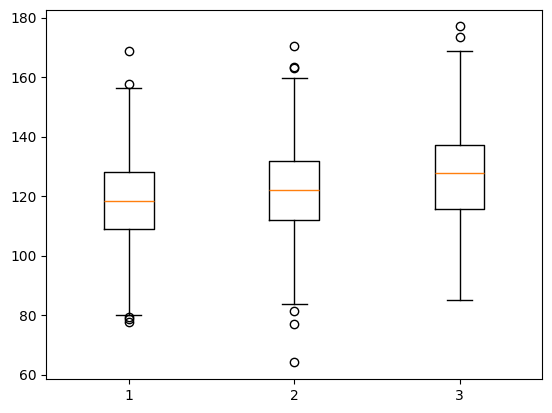

ShapiroResult(statistic=0.9980682673271668, pvalue=0.8499461894333566)
ShapiroResult(statistic=0.9965855431430272, pvalue=0.36955632233188684)
ShapiroResult(statistic=0.9958410658522041, pvalue=0.20978614235038612)
KruskalResult(statistic=67.34245666622246, pvalue=2.381065464815698e-15)
BartlettResult(statistic=2.142756520280948, pvalue=0.3425360880913465)
FlignerResult(statistic=1.9324160543149371, pvalue=0.38052323956563955)
LeveneResult(statistic=0.9442411173233878, pvalue=0.3892061868858101)
결과 : F=34.1, p=0.00000
P-value 값이 0.05보다 작으므로 그룹의 평균값이 통계적으로 유의하다.
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   1.0    2.0   3.1402 0.0038 0.8484   5.432   True
   1.0    3.0   8.0021    0.0 5.7103 10.2939   True
   2.0    3.0   4.8619    0.0 2.5701  7.1537   True
---------------------------------------------------


C:\Users\user\AppData\Local\Temp\ipykernel_14404\3175182451.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


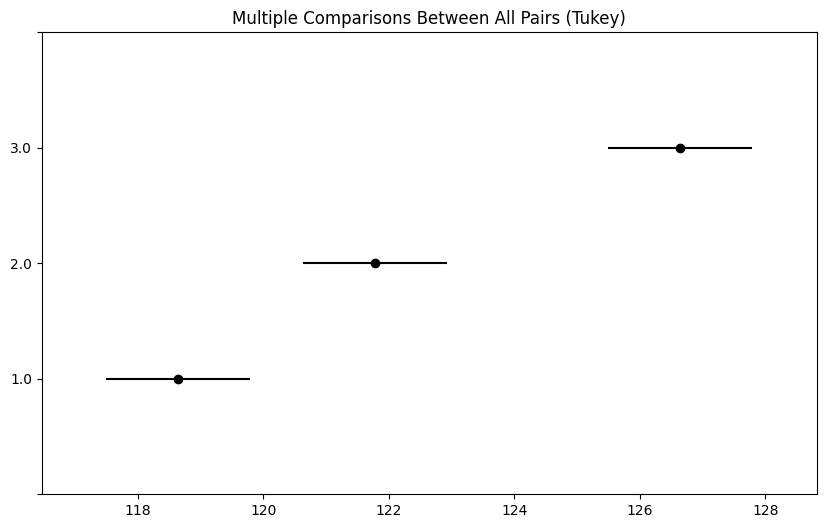

In [2]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from pingouin import welch_anova

no_samples1 = 500
no_samples2 = 500
no_samples3 = 500

g1 = stats.norm(120,15).rvs(no_samples1)
g2 = stats.norm(121,16).rvs(no_samples2)
g3 = stats.norm(126,15).rvs(no_samples3)


plot_data = [g1, g2, g3]
plt.boxplot(plot_data)
plt.show()

print(stats.shapiro(g1))#shapiro 정규성 검증 - 정규분포 random
print(stats.shapiro(g2))
print(stats.shapiro(g3))

# Kruskal-Wallis 
print(stats.kruskal(g1, g2, g3)) #non-parametic 정규성 검증 통과 못할 경우


print(stats.bartlett(g1,g2,g3))
print(stats.fligner(g1,g2,g3))
print(stats.levene(g1,g2,g3)) #등분산  p-value>0.05 정규성 통과 후 등분산 검정 levene 시행한다. 


F_statistic, pVal = stats.f_oneway(g1, g2, g3) #유의확률보다 커야 통과할 수 있다. 


print('결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 0.05보다 작으므로 그룹의 평균값이 통계적으로 유의하다.')
    

ones = np.ones(no_samples1) #numpy 라이브러리 
twos = np.ones(no_samples2)+1 #500개에다가 +1
threes = np.ones(no_samples3)+2 #500개 dataFrame +2 

df1=pd.DataFrame(g1,ones)
df2=pd.DataFrame(g2,twos)
df3=pd.DataFrame(g3,threes)


df = pd.concat([df1,df2,df3],axis=0) #dataframe을 하나로 합친다.
df = df.reset_index() #데이터 프레임 인덱스 재설정
df.columns=['group', 'value'] #group 1 2 3 

posthoc = pairwise_tukeyhsd(df['value'], df['group'], alpha=0.05) #1500개 data를 데이터프레임 생성
print(posthoc) #posthoc는 turkey 사후 검정이라고 생각하면 된다.

fig = posthoc.plot_simultaneous() #사후 분석 실시

fig.show()

#aov = welch_anova(dv='value', between='group', data=df) 
#print(aov)

#ttest 정규성 검증 분산이 같다. 정규성 등분산 검정이 원칙이다. data가 많으면 생략하는 경우가 일반적이다. 
#one-way anova 하고 난 다음에 사후 검정을 해줘야 한다. 여러 개의 클래스들 중에 다른 평균이 있는지 알 수 없다. 과정을 거쳐 보기 위해서 만들어본 것이다.



## 반별점수.csv 
## 일원배치분산분석

ShapiroResult(statistic=0.945466549578293, pvalue=0.12769700002239698)
ShapiroResult(statistic=0.9347030668322036, pvalue=0.06554670297369777)
BartlettResult(statistic=3.011580859938744, pvalue=0.22184187404684652)
FlignerResult(statistic=4.889193095711427, pvalue=0.08676113180613626)
LeveneResult(statistic=2.192593235942955, pvalue=0.11775790930283393)
결과 : F=12.7, p=0.00001
      0
3.0  82
3.0  40
3.0  41
3.0  43
3.0  36
3.0  83
3.0  51
3.0  87
3.0  60
3.0  93
3.0  59
3.0  32
3.0  83
3.0  35
3.0  35
3.0  44
3.0  94
3.0  41
3.0  71
3.0  52
3.0  42
3.0  78
3.0  96
3.0  52
3.0  90
3.0  72
3.0  56
3.0  37
3.0  50
3.0  75
      0
1.0  61
1.0  13
1.0  12
1.0  44
1.0  23
1.0  45
1.0  30
1.0  25
1.0  54
1.0   0
1.0  30
1.0  50
1.0  44
1.0  58
1.0  54
1.0  10
1.0  37
1.0  55
1.0   8
1.0  68
1.0  70
1.0  22
1.0  52
1.0   4
1.0   4
1.0  61
1.0   7
1.0  44
1.0  28
1.0  38
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
-------------------

C:\Users\user\AppData\Local\Temp\ipykernel_2740\1383379177.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


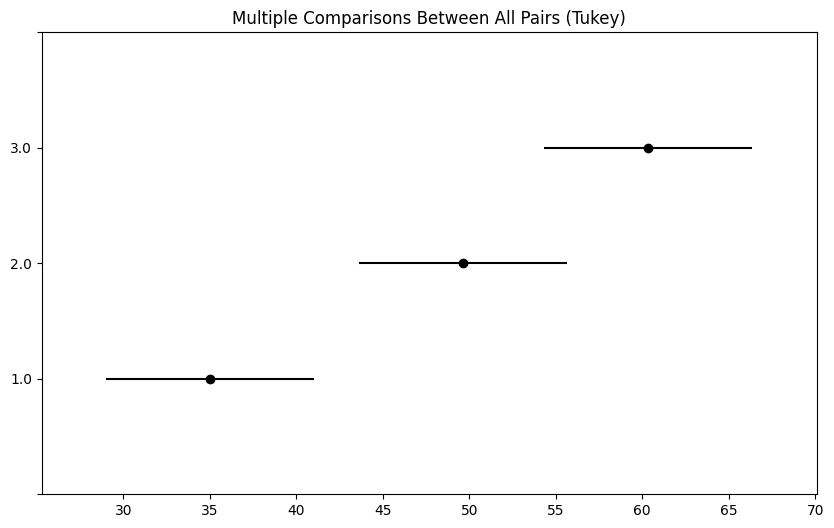

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from pingouin import welch_anova

data = pd.read_excel('score.xlsx')

g1 = data['A']
g2 = data['B']
g3 = data['C']

#print(data.head())

plot_data = [g1, g2, g3]
#plt.boxplot(plot_data)
#plt.show()

print(stats.shapiro(g1))#shapiro 정규성 검증 - 정규분포 random
print(stats.shapiro(g2))
#print(stats.shapiro(g3))

#print(stats.kruskal(g1, g2, g3)) #non-parametic 정규성 검증 통과 못할 경우


print(stats.bartlett(g1,g2,g3))
print(stats.fligner(g1,g2,g3))
print(stats.levene(g1,g2,g3)) #등분산  p-value>0.05 정규성 통과 후 등분산 검정 levene 시행한다. 

F_statistic, pVal = stats.f_oneway(g1, g2, g3)

print('결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
#if pVal < 0.05:
   # print('P-value 값이 0.05보다 작으므로 그룹의 평균값이 통계적으로 유의하다.')
    

ones = np.ones(len(g1)) #numpy 라이브러리 
twos = np.ones(len(g2))+1 #500개에다가 +1
threes = np.ones(len(g3))+2 #500개 dataFrame +2 

df1=pd.DataFrame(g1.values,ones)
df2=pd.DataFrame(g2.values,twos)
df3=pd.DataFrame(g3.values,threes)

print(df3)


df = pd.concat([df1,df2,df3],axis=0) #dataframe을 하나로 합친다.
df = df.reset_index()

print(df1)

df.columns=['group', 'value'] #group 1 2 3 

posthoc = pairwise_tukeyhsd(df['value'], df['group'], alpha=0.05) #1500개 data를 데이터프레임 생성
print(posthoc)

fig = posthoc.plot_simultaneous() #사후 분석 실시

fig.show()



#3개의 data 탐색 2번 3번 비교 미미 3이 좀 큰 값을 가지고 있다. 정규성 검정 통과되었다고 볼 수 있다. 등분산 검정에서 분산 3개 통과. 0.05보다 크다. 
#유의 확률 0.05보다 작게 나와서 통계적으로 의미 있다고 볼 수 있다. 

## 카이제곱 검정 - 적합성검정(기대빈도)

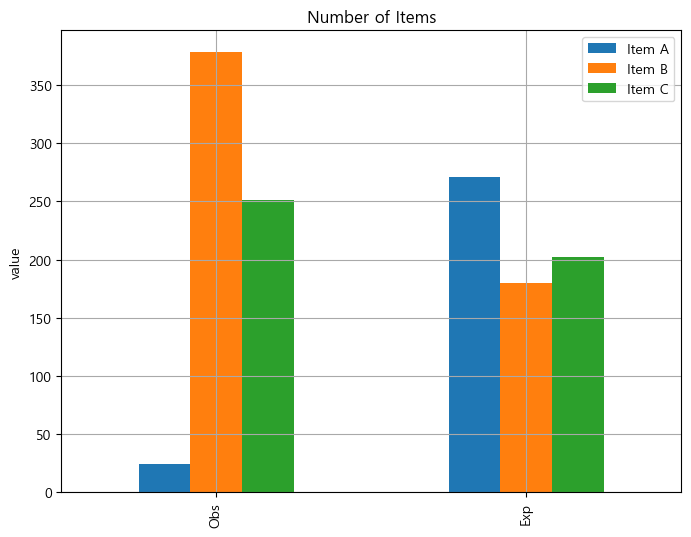

Power_divergenceResult(statistic=454.81159986847393, pvalue=1.7334684263715945e-99)


In [13]:
#연구가설은 대립가설로 하고 진행
#범주형 데이터 10대 20대 선호하는 브랜드 존재. apple과 삼성이라고 하자. 연령대 10대 20대 30대 선호하는 숫자 투표 조사 정수(명) table data 
#10대 20대 30대 남 녀 대학교 학년별 남녀간에 선호도 차이가 있느냐 합격률에 차이가 있느냐 
from pandas import DataFrame
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns


xo, xe = [24, 378, 251], [271, 180, 202] #expected 기대 빈도 
xc = DataFrame([xo, xe], columns=['Item A', 'Item B', 'Item C'], index=['Obs', 'Exp']) #관관

#############
#bar plot을 작성

# %matplotlib inline

ax = xc.plot(kind='bar', title='Number of Items', figsize=(8, 6))
ax.set_ylabel('value')
plt.grid(color='darkgray')
plt.show()


#from scipy.stats의 chisquare()를 이용하여 카이제곱 검정을 실행


result1 = chisquare(xo, f_exp=xe) # 일원카이제곱 관찰빈도(특정지역) vs. 기대빈도(판매빈도)
print(result1) #xo 관찰 데이터 xe 기대빈도 

#p-value가 1.7334684263715945e-99로 0에 가깝다.  유의수준 0.05보다 아주 작은 값이므로 귀무가설을 기각하고 대립가설을 지지

#즉 연구가설이 지지 


## 카이제곱 - 독립성검정 / 동질성검정

      애플   삼성
10대  205   80
20대  180  200
30대  120  200


c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\Miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


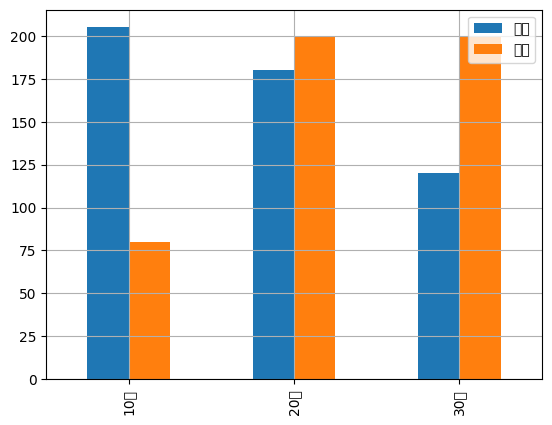

Chi2ContingencyResult(statistic=75.29117632157948, pvalue=4.474338054972927e-17, dof=2, expected_freq=array([[146.11675127, 138.88324873],
       [194.82233503, 185.17766497],
       [164.06091371, 155.93908629]]))


In [12]:
#연구가설은 대립가설로 하고 진행 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

a, b, c = [205, 80], [180, 200], [120, 200]
df = pd.DataFrame([a, b, c], columns = ['애플', '삼성'], index = ['10대', '20대', '30대']) #10대 20대 30대 간에 동질성 검정 같으냐 틀리냐
print(df) #데이터 프레임 만들고 난 뒤 

###########

df.plot(kind = 'bar') #플롯
plt.rc('font', family='Malgun Gothic') 
plt.grid()
plt.show()

#############
#bar plot을 작성

result = chi2_contingency(df) #카이스퀘어 돌리고 난 뒤  카이2 contingecy 
print(result)

#p-value가 1.7334684263715945e-99로 유의수준 0.05보다 아주 작은 값이므로 귀무가설을 기각하고 대립가설을 지지

#즉 연구가설이 지지


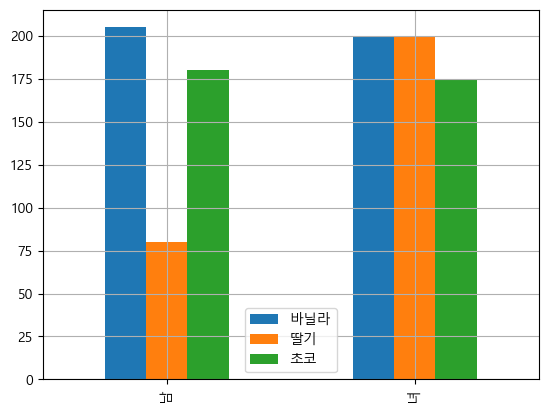

Chi2ContingencyResult(statistic=40.377818890440494, pvalue=1.7063496680020139e-09, dof=2, expected_freq=array([[181.08173077, 125.19230769, 158.72596154],
       [223.91826923, 154.80769231, 196.27403846]]))


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

a, b = [205, 80, 180], [200, 200, 175]
df = pd.DataFrame([a, b], columns = ['바닐라', '딸기', '초코'], index = ['남', '녀'])


df.plot(kind = 'bar') #플롯
plt.rc('font', family='Malgun Gothic') 
plt.grid()
plt.show()

result = chi2_contingency(df) #카이스퀘어 돌리고 난 뒤  카이2 contingecy 
print(result)